# Topic Modeling for Customer Review Insights

### Project Context
In previous notebooks, we built machine learning and deep learning models to classify customer reviews into Positive, Neutral, and Negative sentiments.

However, sentiment classification only tells whether customers are satisfied or dissatisfied.  
It does not explain the *reason* behind customer opinions.

To understand the actual concerns of customers, we perform **Topic Modeling**.

Topic Modeling is an unsupervised Natural Language Processing (NLP) technique that automatically discovers hidden themes or topics within large text datasets.

### Objective of this Notebook
The goals of this notebook are:

- Discover common discussion themes in reviews
- Identify product aspects customers talk about
- Apply LDA and NMF algorithms
- Generate actionable business insights
- Support decision-making in e-commerce

#### **Import Required Libraries**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

import warnings
warnings.filterwarnings("ignore")

#### **Load Dataset**

In [86]:
df = pd.read_csv('../data/processed_train.csv')
df.head()

,clean_review,sentiment
0,powerful tablet purchased black fridaypros gre...,Positive
1,amazon echo plus awesome purchased two amazon ...,Positive
2,average average alexa option show things scree...,Neutral
3,greattttttt good product exactly wanted good p...,Positive
4,durable rd one purchased bought one nieces cas...,Positive


#### **Dataset Inspection**
We confirm the availability of cleaned review text.

In [87]:
df["clean_review"].head()

0    powerful tablet purchased black fridaypros gre...
1    amazon echo plus awesome purchased two amazon ...
2    average average alexa option show things scree...
3    greattttttt good product exactly wanted good p...
4    durable rd one purchased bought one nieces cas...
Name: clean_review, dtype: object

#### **Latent Dirichlet Allocation (LDA)**

#### **Creating Document-Term Matrix**
LDA works on word frequency (Bag of Words) representation.

In [88]:
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words="english"
)

doc_term_matrix = count_vectorizer.fit_transform(df["clean_review"])
print("Document-Term Matrix shape:", doc_term_matrix.shape)

Document-Term Matrix shape: (11247, 1824)


#### **Training LDA Model**
We extract 5 hidden topics from the reviews.

In [89]:
lda_model = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

lda_model.fit(doc_term_matrix)
print("LDA Model fitted successfully.")

LDA Model fitted successfully.


#### **Top Words in Each Topic**
We print the most important words for each topic.

In [90]:
words = count_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, num_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        print([feature_names[i] for i in topic.argsort()[-num_words:]])

display_topics(lda_model, words)
print("\n" + "="*100 + "\n")


Topic 1:
['amazon', 'bought', 'product', 'echo', 'good', 'use', 'easy', 'love', 'tablet', 'great']

Topic 2:
['happy', 'bought', 'ok', 'product', 'apps', 'amazon', 'kindle', 'device', 'kids', 'tablet']

Topic 3:
['great', 'ok', 'echo', 'like', 'price', 'apps', 'good', 'work', 'amazon', 'tablet']

Topic 4:
['model', 'going', 'good', 'great', 'device', 'youtube', 'amazon', 'tablet', 'bought', 'kindle']

Topic 5:
['kindle', 'used', 'th', 'generation', 'bought', 'junk', 'week', 'use', 'good', 'sound']




#### **Non-Negative Matrix Factorization (NMF)**

#### ***TF-IDF Representation***
NMF works better with TF-IDF features.

In [91]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words="english"
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df["clean_review"])

#### ***Training NMF Model***
We again extract 5 topics using a different algorithm.

In [92]:
nmf_model = NMF(
    n_components=5,
    random_state=42
)

nmf_model.fit(tfidf_matrix)

,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


#### **Top Words in NMF Topics**

In [93]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_words)


Topic 1:
['little', 'apps', 'games', 'great', 'amazon', 'price', 'ok', 'kids', 'good', 'tablet']

Topic 2:
['like', 'device', 'bought', 'alexa', 'easy', 'product', 'love', 'echo', 'use', 'great']

Topic 3:
['overrated', 'returned', 'apps', 'disappointed', 'updated', 'version', 'crashed', 'curious', 'update', 'kindle']

Topic 4:
['loved', 'quality', 'louder', 'current', 'husbands', 'expecting', 'disappointed', 'sound', 'generation', 'th']

Topic 5:
['slot', 'defective', 'impressed', 'kindle', 'going', 'model', 'models', 'shuts', 'kindles', 'year']


#### **Assign Dominant Topic to Each Review**

In [94]:
topic_values = nmf_model.transform(tfidf_matrix)
df['dominant_topic'] = topic_values.argmax(axis=1)
df[['clean_review','dominant_topic']].head()

,clean_review,dominant_topic
0,powerful tablet purchased black fridaypros gre...,0
1,amazon echo plus awesome purchased two amazon ...,1
2,average average alexa option show things scree...,1
3,greattttttt good product exactly wanted good p...,0
4,durable rd one purchased bought one nieces cas...,0


#### **Topic Distribution Visualization**

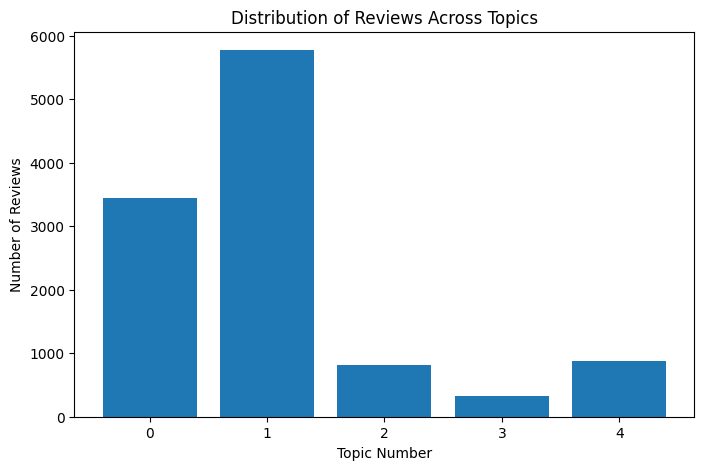

In [95]:
topic_counts = df['dominant_topic'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic Number')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews Across Topics')
plt.show()

#### **Save Topic Results**
Saving Topic Modeling Results

We save the topic-labeled reviews for further analysis.

In [96]:
df.to_csv('../data/review_topics.csv', index=False)

#### **Business Insights from Topic Modeling**

By analyzing the most frequent words in each topic, we can interpret what customers are discussing.

Typical discovered themes include:

- Product quality and performance
- Battery life and charging
- Packaging and damage during delivery
- Delivery delays and service issues
- Display and sound quality

This analysis helps businesses understand not only the sentiment but also the specific reasons behind customer satisfaction and dissatisfaction.

## Summary
In this notebook, topic modeling techniques LDA and NMF were applied to customer reviews to identify hidden themes in feedback data. The analysis grouped reviews into multiple topics representing product-related concerns such as quality, delivery, packaging, and performance.

Topic modeling provides valuable business insights by explaining the reasons behind customer satisfaction and dissatisfaction. Companies can use these findings to improve product quality, enhance service, and prioritize customer experience improvements.
